In [1]:
from keras.layers import Input,Dense,Flatten,Dropout,BatchNormalization
from keras.models import Model,Sequential,save_model,load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from keras.layers import Conv2D,SeparableConv2D,MaxPool2D,Activation
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [4]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [5]:
val_set = test_datagen.flow_from_directory('Datasets/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [6]:

img_dims=224
epochs=10
batch_size=32

model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(img_dims,img_dims,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 52, 52, 128)       5

In [7]:
lr_reduce=ReduceLROnPlateau(monitor='val_loss',factor=0.3,patience=1,verbose=2,mode='max')

In [22]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=epochs,
  steps_per_epoch=training_set.samples//batch_size,
  validation_steps=test_set.samples//batch_size,callbacks=[lr_reduce]
)

Epoch 1/10
163/163 [==============================] - 321s 2s/step - loss: 0.6552 - accuracy: 0.8604 - val_loss: 0.8388 - val_accuracy: 0.6234
Epoch 2/10
163/163 [==============================] - 253s 2s/step - loss: 0.1855 - accuracy: 0.9300 - val_loss: 13.3410 - val_accuracy: 0.6266
Epoch 3/10
163/163 [==============================] - 258s 2s/step - loss: 0.1696 - accuracy: 0.9403 - val_loss: 16.2056 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 258s 2s/step - loss: 0.1368 - accuracy: 0.9444 - val_loss: 0.4023 - val_accuracy: 0.8322

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/10
163/163 [==============================] - 259s 2s/step - loss: 0.1028 - accuracy: 0.9600 - val_loss: 0.2365 - val_accuracy: 0.9030

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 6/10
163/163 [==============================] - 261s 2s/step - loss: 0.0924 - accuracy: 0.9684 - val_loss: 0.6467 -

In [23]:
from keras.models import save_model
filepath='./pneumonia_model.h5'
save_model(model,filepath)

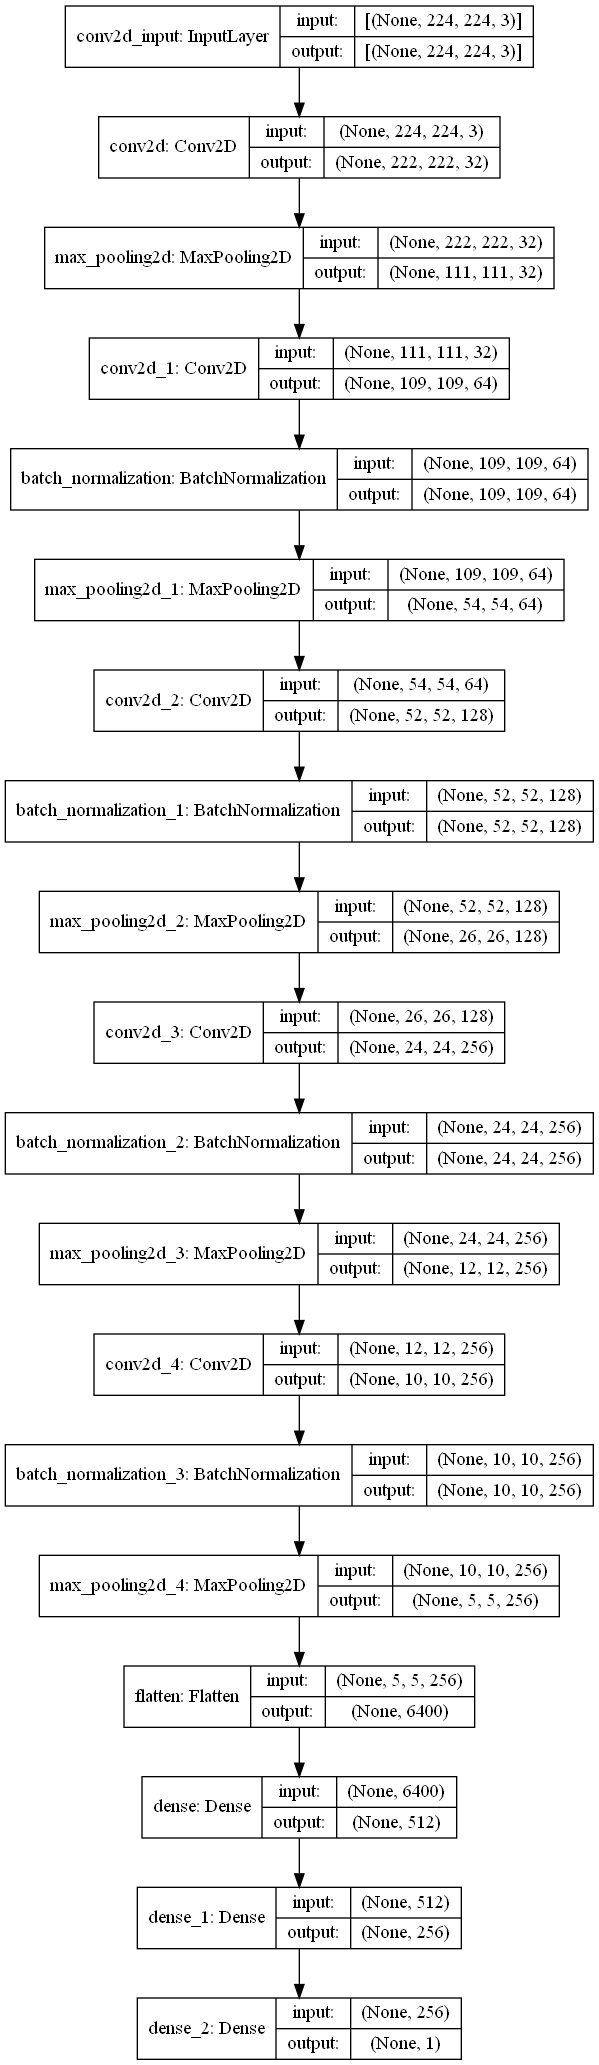

In [8]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)